In [1]:
import sys
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [2]:
def extractMFCCs(path, genre=None, print_message=True):
    """
    Extract MFCCs from sound files in folder
    Genre shift is used to convert from indexing per genre (4 times 1-100) to indexing over all samples (1-400)
    There are some songs of shorter duration, their MFCC array will be filled with empty values 
    """

    sample_rate = 44100

    n_fft = 8192
    n_MFCC = 20
    win_length = int(0.025*sample_rate)
    hop_length = int(0.010*sample_rate)

    # used to make all mfcc arrays of same size for vectorization
    length_mfcc_sequence = 6003
    number_of_samples_per_genre = 100

#     genre_shift = 0

#     if genre == "electronic":
#         genre_shift = 100
#     elif genre == "pop":
#         genre_shift = 200
#     elif genre == "rock":
#         genre_shift = 300

#     INDEX = []
    MFCCs = np.empty((n_MFCC, length_mfcc_sequence, number_of_samples_per_genre))

    for file in os.scandir(path):
        if file.path.endswith(".mp3"):
            if print_message:
                print("analyzing ", file.name, file.path)

            currentpath = path + "/" + file.name
            int_track = int(file.name[:-4])
#             int_track_shifted = int_track + genre_shift

            sound, sample_rate = librosa.load(currentpath, sr=None, mono=True)
            mfcc = librosa.feature.mfcc(
                sound, sr=sample_rate, n_fft=n_fft, n_mfcc=n_MFCC, hop_length=hop_length, win_length=win_length)

            if np.shape(mfcc)[1] < length_mfcc_sequence:
                mfcc = np.append(mfcc, np.empty(
                    (20, length_mfcc_sequence-np.shape(mfcc)[1])), axis=-1)

            elif np.shape(mfcc)[1] > length_mfcc_sequence:
                mfcc = mfcc[:, :length_mfcc_sequence]

            print(int_track, np.shape(mfcc))

#             INDEX.append(int_track)
            MFCCs[:, :, int_track-1] = mfcc

    return MFCCs#, INDEX

In [3]:
path = "../data/emotifymusic/"
genres = ["classical", "electronic", "pop", "rock"]

MFCC = []

for genre in genres:
    mfccs = extractMFCCs(path+genre, genre=genre)
    MFCC.append(mfccs)
    
np.savez_compressed('MFCCs.npz', classical=MFCC[0], electronic=MFCC[1], pop=MFCC[2], rock=MFCC[3])

analyzing  1.mp3 ../data/emotifymusic/classical\1.mp3


C:\Users\Carsten\anaconda3\envs\musicInformatics\lib\site-packages\librosa\core\audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


1 (20, 6003)
analyzing  10.mp3 ../data/emotifymusic/classical\10.mp3
10 (20, 6003)
analyzing  100.mp3 ../data/emotifymusic/classical\100.mp3
100 (20, 6003)
analyzing  11.mp3 ../data/emotifymusic/classical\11.mp3
11 (20, 6003)
analyzing  12.mp3 ../data/emotifymusic/classical\12.mp3
12 (20, 6003)
analyzing  13.mp3 ../data/emotifymusic/classical\13.mp3
13 (20, 6003)
analyzing  14.mp3 ../data/emotifymusic/classical\14.mp3
14 (20, 6003)
analyzing  15.mp3 ../data/emotifymusic/classical\15.mp3
15 (20, 6003)
analyzing  16.mp3 ../data/emotifymusic/classical\16.mp3
16 (20, 6003)
analyzing  17.mp3 ../data/emotifymusic/classical\17.mp3
17 (20, 6003)
analyzing  18.mp3 ../data/emotifymusic/classical\18.mp3
18 (20, 6003)
analyzing  19.mp3 ../data/emotifymusic/classical\19.mp3
19 (20, 6003)
analyzing  2.mp3 ../data/emotifymusic/classical\2.mp3
2 (20, 6003)
analyzing  20.mp3 ../data/emotifymusic/classical\20.mp3
20 (20, 6003)
analyzing  21.mp3 ../data/emotifymusic/classical\21.mp3
21 (20, 6003)
analyzi

25 (20, 6003)
analyzing  26.mp3 ../data/emotifymusic/electronic\26.mp3
26 (20, 6003)
analyzing  27.mp3 ../data/emotifymusic/electronic\27.mp3
27 (20, 6003)
analyzing  28.mp3 ../data/emotifymusic/electronic\28.mp3
28 (20, 6003)
analyzing  29.mp3 ../data/emotifymusic/electronic\29.mp3
29 (20, 6003)
analyzing  3.mp3 ../data/emotifymusic/electronic\3.mp3
3 (20, 6003)
analyzing  30.mp3 ../data/emotifymusic/electronic\30.mp3
30 (20, 6003)
analyzing  31.mp3 ../data/emotifymusic/electronic\31.mp3
31 (20, 6003)
analyzing  32.mp3 ../data/emotifymusic/electronic\32.mp3
32 (20, 6003)
analyzing  33.mp3 ../data/emotifymusic/electronic\33.mp3
33 (20, 6003)
analyzing  34.mp3 ../data/emotifymusic/electronic\34.mp3
34 (20, 6003)
analyzing  35.mp3 ../data/emotifymusic/electronic\35.mp3
35 (20, 6003)
analyzing  36.mp3 ../data/emotifymusic/electronic\36.mp3
36 (20, 6003)
analyzing  37.mp3 ../data/emotifymusic/electronic\37.mp3
37 (20, 6003)
analyzing  38.mp3 ../data/emotifymusic/electronic\38.mp3
38 (20, 6

43 (20, 6003)
analyzing  44.mp3 ../data/emotifymusic/pop\44.mp3
44 (20, 6003)
analyzing  45.mp3 ../data/emotifymusic/pop\45.mp3
45 (20, 6003)
analyzing  46.mp3 ../data/emotifymusic/pop\46.mp3
46 (20, 6003)
analyzing  47.mp3 ../data/emotifymusic/pop\47.mp3
47 (20, 6003)
analyzing  48.mp3 ../data/emotifymusic/pop\48.mp3
48 (20, 6003)
analyzing  49.mp3 ../data/emotifymusic/pop\49.mp3
49 (20, 6003)
analyzing  5.mp3 ../data/emotifymusic/pop\5.mp3
5 (20, 6003)
analyzing  50.mp3 ../data/emotifymusic/pop\50.mp3
50 (20, 6003)
analyzing  51.mp3 ../data/emotifymusic/pop\51.mp3
51 (20, 6003)
analyzing  52.mp3 ../data/emotifymusic/pop\52.mp3
52 (20, 6003)
analyzing  53.mp3 ../data/emotifymusic/pop\53.mp3
53 (20, 6003)
analyzing  54.mp3 ../data/emotifymusic/pop\54.mp3
54 (20, 6003)
analyzing  55.mp3 ../data/emotifymusic/pop\55.mp3
55 (20, 6003)
analyzing  56.mp3 ../data/emotifymusic/pop\56.mp3
56 (20, 6003)
analyzing  57.mp3 ../data/emotifymusic/pop\57.mp3
57 (20, 6003)
analyzing  58.mp3 ../data/emo

69 (20, 6003)
analyzing  7.mp3 ../data/emotifymusic/rock\7.mp3
7 (20, 6003)
analyzing  70.mp3 ../data/emotifymusic/rock\70.mp3
70 (20, 6003)
analyzing  71.mp3 ../data/emotifymusic/rock\71.mp3
71 (20, 6003)
analyzing  72.mp3 ../data/emotifymusic/rock\72.mp3
72 (20, 6003)
analyzing  73.mp3 ../data/emotifymusic/rock\73.mp3
73 (20, 6003)
analyzing  74.mp3 ../data/emotifymusic/rock\74.mp3
74 (20, 6003)
analyzing  75.mp3 ../data/emotifymusic/rock\75.mp3
75 (20, 6003)
analyzing  76.mp3 ../data/emotifymusic/rock\76.mp3
76 (20, 6003)
analyzing  77.mp3 ../data/emotifymusic/rock\77.mp3
77 (20, 6003)
analyzing  78.mp3 ../data/emotifymusic/rock\78.mp3
78 (20, 6003)
analyzing  79.mp3 ../data/emotifymusic/rock\79.mp3
79 (20, 6003)
analyzing  8.mp3 ../data/emotifymusic/rock\8.mp3
8 (20, 6003)
analyzing  80.mp3 ../data/emotifymusic/rock\80.mp3
80 (20, 6003)
analyzing  81.mp3 ../data/emotifymusic/rock\81.mp3
81 (20, 6003)
analyzing  82.mp3 ../data/emotifymusic/rock\82.mp3
82 (20, 6003)
analyzing  83.mp3

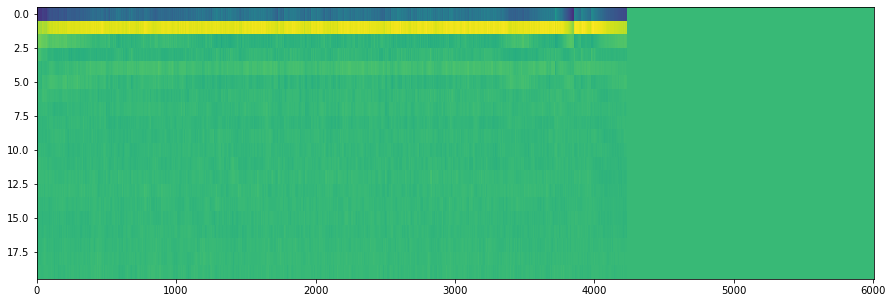

In [6]:
G = 0  # choose genre #
N = 15  # choose sample #
fig, ax = plt.subplots(figsize=(15, 5))
ax.imshow(MFCC[G][:, :, N], interpolation='nearest', aspect='auto')
plt.show()

In [5]:
"""
Load as:
"""

# data = np.load('MFCCtest2.npz') 
# np.shape(data['classical'])

'\nLoad as:\n'